# Introduction to Binomial Tree Option Pricing using ```pyop3```

Author: Caden Lee (caden.finsinyur@gmail.com)

In [1]:
import pyop3

## Overview

Welcome to the first tutorial on PyOptionTree (```pyop3```)! This is a Python library designed for option pricing with lattice models. This is the first tutorial of an entire series dedicated to demonstrating how the ```pyop3``` library can be used. Do feel free to send your feedback to us (to email address above) on how to make the library more useful.

In this tutorial, we will explore the key construct of the ```pyop3``` library. The steps to using the ```pyop3``` library are fairly straightforward. It starts with importing the library, and setting up the underlying asset lattice by creating the ```pyop3.binomial_tree``` object. Once the underlying asset lattice is initiated, we could visualize the tree by using the ```pyop3.tree_planter.show_tree()``` function.

To price the European option, we will need to create a ```pyop3.european_option``` object by passing the underlying asset object and strike price. Once that is initialized, run the call or put method to get the respective option value and option lattice.

<img src='img/tut1_pic1.png' width="500" alt='Procedure to price option using pyop3'/>

In this tutorial, we will be focusing solely on the above basic steps, and the pricing of European option on:
- non-dividend paying underlying asset (given a. time-to-expiry, and b. spot date and expiry date)
- Dividend paying underlying asset (known dollar dividends with ex-div coinciding expiry)
- Dividend paying underlying asset (knwon dollar dividends with ex-div before expiry)


## Example 1: European Options on Non-Dividend Paying Stock

### 1.a. Calculation based on number of years to expiration

Key parameters:

Spot price $S_0 = 300$, strike price $K = 300$, interest rate $r = 8\%$

Time to expiry $T = 0.3333$ years, Timestep $N = 4$, volatility $\sigma = 30\%$



To evaluate the option price, we first need to generate the underlying asset binomial tree.
In pyop3, this can be easily created by initiating a ```pyop3.binomial_tree()``` object. To initialize the object, we need to provide compulsory parameters such as the spot price $S_0$, interest rate $r$, time to expiry (in years), and number of discrete steps to expiry (time step). Under PyOp3, user can either define the upstep $u$ or the implied volatility $\sigma$.

In [2]:
# Initialize the binomial tree object
asset_1 = pyop3.binomial_tree(300, 0.08, 0.3333, sigma = 0.3)

The ```pyop3.binomial_tree()``` object allows one to review the underlying asset information through the ```underlying_asset_summary()``` method. This method provides a summary of the spot price, time to expiry, interest rate, implied volatility and other dividend related information. 

The ```underlying_asset_tree()``` method generates the underlying asset lattice in a numpy.ndarray. This lattice can be best visualized using ```pyop3.tree_planter.show_tree()``` function.

In [3]:
# View underlying asset information
asset_1.underlying_asset_summary()

UNDERLYING ASSET SUMMARY
        +--------------------------------+
              Spot price: 	 $300.00
              Time to expiry: 	 0.3333 years
              interest rate: 	 8.00%
              implied vol: 	 30.00%
              
No dividend payment expected during the course of the contract.


In [4]:
# Generate lattice of the underlying asset prices
asset_1_tree = asset_1.underlying_asset_tree()
print(asset_1_tree)

[[300.         327.13753696 356.72989363 388.99912921 424.18739004]
 [  0.         275.11364436 300.         327.13753696 356.72989363]
 [  0.           0.         252.29172437 275.11364436 300.        ]
 [  0.           0.           0.         231.36298578 252.29172437]
 [  0.           0.           0.           0.         212.17038062]]


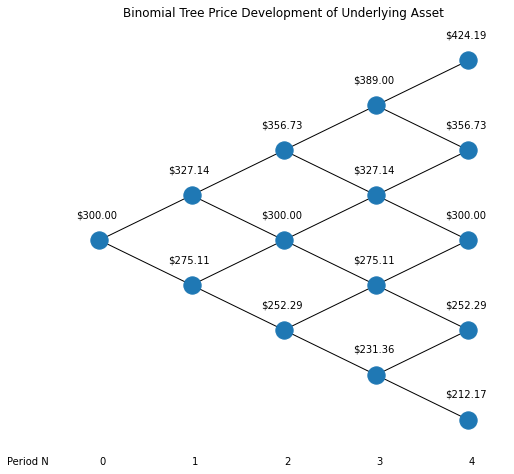

In [5]:
# Visualize the tree in a graphic for better illustration
pyop3.tree_planter.show_tree(asset_1_tree, "Binomial Tree Price Development of Underlying Asset")

To evaluate the option, we need to initialize the ```pyop3.european_option()``` object. To initialize this object, we need to pass the ```pyop3.binomial_tree()``` object and the strike price $K$. 

Once initialized, we can start to compute the call and put prices by running ```.call()``` and ```.put()``` methods respectively. When running these methods, one does not need to assign the output to a variable. ```.call_value``` and ```.call_option``` attributes will be initialized the moment the ```.call()``` method runs. The ```.call_value``` shows the theoretical price of the option, while the ```.call_option``` attribute shows the entire call option value tree, which can be used with ```pyop3.tree_planter.show_tree()``` function to visualize the tree.

In [6]:
# Now initialize the European option
asset_1_options = pyop3.european_option(asset_1, 300)
print(asset_1_options.call_value)

None


In [7]:
# To calculate call value, we need to first run the .call() method of the option object
asset_1_options.call()
print(asset_1_options.call_value)

23.377924012466476


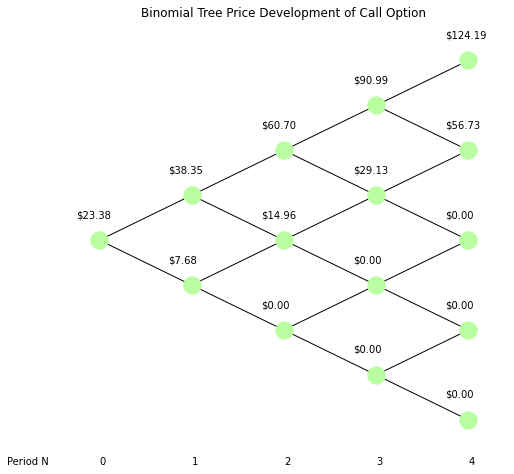

In [8]:
pyop3.tree_planter.show_tree(asset_1_options.call_option,\
                             "Binomial Tree Price Development of Call Option",\
                             node_color = '#B9FEA1')

### 1.b. Calculation given spot date and expiry date

In order to fit into practical application, PyOp3 allows users to define current date and expiry date instead of the Time to Expiry. Amongst the keyword arguments there exists ```spot_date``` and ```day_first```, which are set to ```None``` and ```True``` by default respectively. ```day_first``` helps us to reduce ambiguity when providing the dates. When ```day_first``` is set to ```True```:
- the date format to provide, in str, is ```DD/MM/YYYY```, else
- the date format to provide, in str, is ```MM/DD/YYYY```

In [9]:
# Initialize the binomial tree object
asset_2 = pyop3.binomial_tree(300, 0.08, '23/12/2022', sigma = 0.3, spot_date = '01/09/2022')

In [10]:
asset_2.underlying_asset_summary()

UNDERLYING ASSET SUMMARY
        +--------------------------------+
              Spot price: 	 $300.00
              Time to expiry: 	 0.3214 years
              interest rate: 	 8.00%
              implied vol: 	 30.00%
              
No dividend payment expected during the course of the contract.


In [11]:
# Generate lattice of the underlying asset prices
asset_2_tree = asset_2.underlying_asset_tree()
print(asset_2_tree)

[[300.         326.62884023 355.6213309  387.18727625 421.55510331]
 [  0.         275.54211054 300.         326.62884023 355.6213309 ]
 [  0.           0.         253.07818227 275.54211054 300.        ]
 [  0.           0.           0.         232.44565491 253.07818227]
 [  0.           0.           0.           0.         213.49522113]]


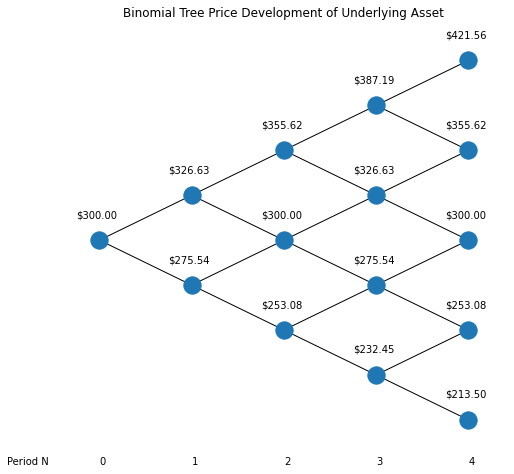

In [12]:
# Visualize the tree in a graphic for better illustration
pyop3.tree_planter.show_tree(asset_2_tree, "Binomial Tree Price Development of Underlying Asset")

In [13]:
# Now initialize the European option
asset_2_options = pyop3.european_option(asset_2, 300)
asset_2_options.put()

print(asset_2_options.put_value)

15.275892052555896


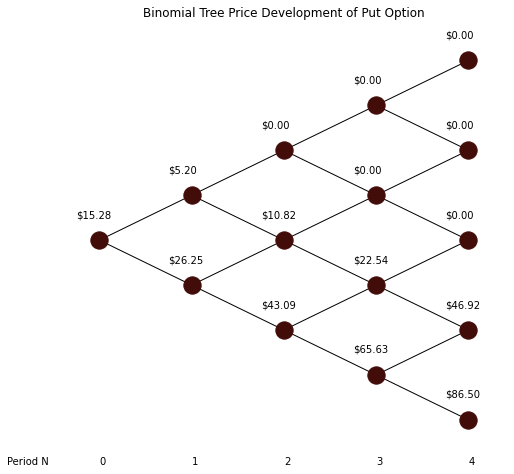

In [14]:
pyop3.tree_planter.show_tree(asset_2_options.put_option,\
                             "Binomial Tree Price Development of Put Option",\
                             node_color = '#420D09')

## Example 2: European Option on Dividend Paying Stocks

### 2.a. Ex-Dividend coinciding expiry date

The ```pyop3.binomial_tree``` object does take into account dividend payments. Amongst the optional keyword arguments, one can define known dollar dividend ```div``` or dividend yield ```div_yield```. For convenience's sake, user can also define, for known dollar dividend, either which step does the dividend occurs ```ex_div_step``` or the ex-dividend date ```ex_div_date```.

UNDERLYING ASSET SUMMARY
        +--------------------------------+
              Spot price: 	 $300.00
              Time to expiry: 	 0.3333 years
              interest rate: 	 8.00%
              implied vol: 	 30.00%
              
Dollar dividends: 	 $30.00.
Dividend to occur at step 4.


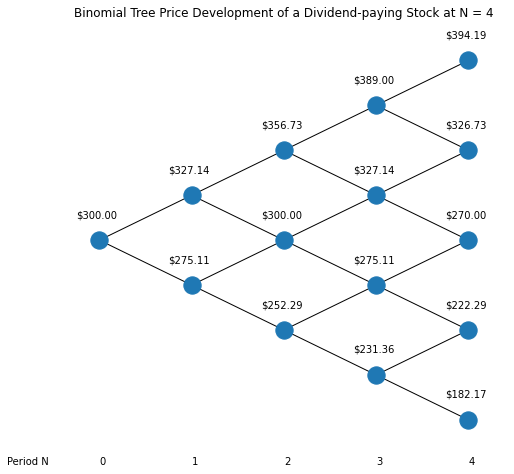

In [15]:
div_asset_1 = pyop3.binomial_tree(300, 0.08, 0.3333, sigma = 0.30, div = 30, ex_div_step = 4)
div_asset_1.underlying_asset_summary()
pyop3.tree_planter.show_tree(div_asset_1.underlying_asset_tree(),\
                             "Binomial Tree Price Development of a Dividend-paying Stock at N = 4")

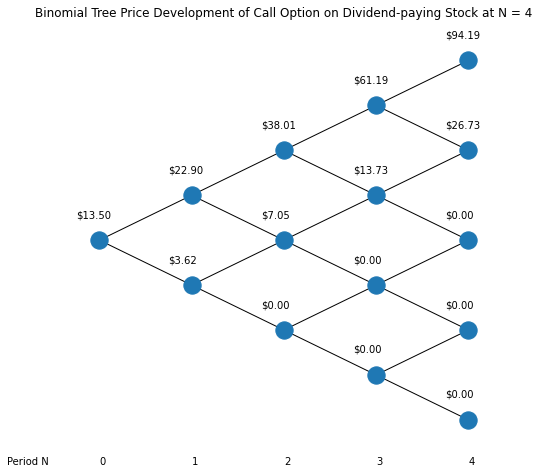

In [16]:
div_asset_1_options = pyop3.european_option(div_asset_1, 300)
div_asset_1_options.call()
pyop3.tree_planter.show_tree(div_asset_1_options.call_option,\
                             "Binomial Tree Price Development of Call Option on Dividend-paying Stock at N = 4")

In [17]:
print('Call option of asset 1 without dividend: ${:.2f}'.format(asset_1_options.call_value))
print('Call option of asset 1 with dividend: ${:.2f}'.format(div_asset_1_options.call_value))

Call option of asset 1 without dividend: $23.38
Call option of asset 1 with dividend: $13.50


### 2.b. Ex-dividend date before expiration date

In practical application, known dollar dividends may have ex-dividend date before the expiration of the option contracts. Unlike having ex-div coinciding expiry, an ex-div occuring during the lifetime of the contract before expiry introduces a problem for lattice models. The advantage of binomial tree is the recombining feature, in which an upstep from one node in the previous time step coincide with a downstep of an adjacent node in the same time step. 

With dividends payment at any time step prior to expiration, recombining feature no longer applies. As dividend payment shifts the value of the nodes downwards, the upstep of a node in the previous time step no longer coinicides with the downstep of an adjacent node in the same time step. 

```pyop3``` V0.1.0 offers an approximation of an call option. This follows the approximation introduced by Natenberg, in which he simply deduct the dividends from the nodes from and after the ex-div. His approximation would work if the time period between ex-div and expiration is short. In ```pyop3``` v0.1.0, we made a slight improvement to this model. We simply create a tree of dividends, by forgoing some up and down branches to forcefully recombine the tree. This is not a perfect approximation, and this will be part of the improvement in later version.

To illustrate the dividend tree, one may run the private method ```.__dividend_tree__()```. As this is a private method, it is not recommended for users to run this explicitly. We run this here solely to illustrate the approximation method.

UNDERLYING ASSET SUMMARY
        +--------------------------------+
              Spot price: 	 $300.00
              Time to expiry: 	 0.3333 years
              interest rate: 	 8.00%
              implied vol: 	 30.00%
              
Dollar dividends: 	 $30.00.
Dividend to occur at step 4.


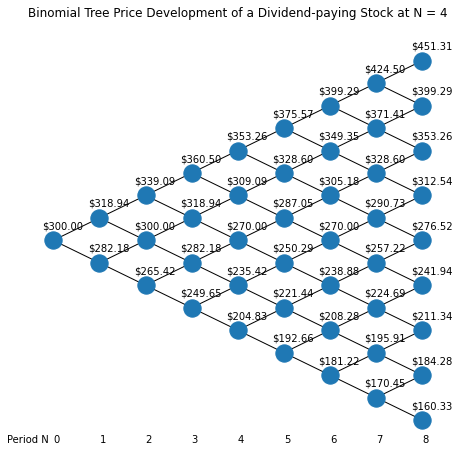

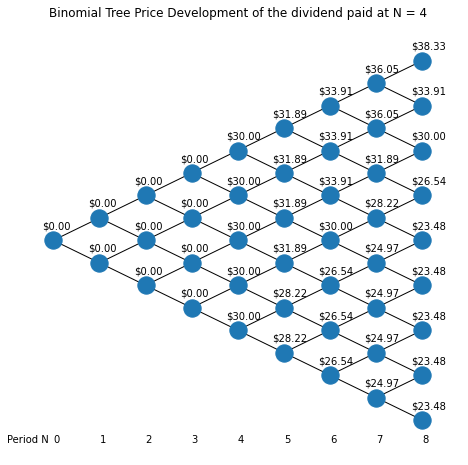

In [18]:
div_asset_1_b = pyop3.binomial_tree(300, 0.08, 0.3333, N = 8, sigma = 0.30, div = 30, ex_div_step = 4)
unit_asset = pyop3.binomial_tree(1, 0.08, 0.3333, N = 8, sigma = 0.30)
div_asset_1_b.underlying_asset_summary()
pyop3.tree_planter.show_tree(div_asset_1_b.underlying_asset_tree(),\
                             "Binomial Tree Price Development of a Dividend-paying Stock at N = 4")
pyop3.tree_planter.show_tree(div_asset_1_b.__dividend_tree__(),\
                             "Binomial Tree Price Development of the dividend paid at N = 4")

### 2.c. Ex-dividend date before expiration date, given spot date, expiration date, ex-div date

Practically, when evaluating options with dividends, we are often provided with the explicit dates. Thus, ```pyop3``` is also designed to allow for explicit dates to be provided.

When provided with ```ex_div_date```, user needs to define parameter ```freq_by``` of the ```pyop3.binomial_tree``` object as ```'days'``` instead of ```N```. For ```pyop3``` v0.1.0, in order to ensure that ex-dividend date lies on a discrete node, it is currently design to enfore that time step to the number of days to expiry instead of allowing user to define the step. This will be part of the future improvement. 

Due to having the number of days to expiry be the time step, it is <b>not recommended</b> to run ```pyop3.tree_planter.show_tree()``` on the resulting ```pyop3.binomial_tree``` object and the derived options.

In [19]:
div_asset_2 = pyop3.binomial_tree(300, 0.08, '23/12/2022', N = None, sigma = 0.3, spot_date = '01/09/2022', \
                                  div = 30, ex_div_date = '01/12/2022', freq_by = 'days')
div_asset_2.underlying_asset_summary()
div_asset_2_options = pyop3.european_option(div_asset_2, 300)
div_asset_2_options.put()
print('Put option of asset 2 without dividend: ${:.2f}'.format(asset_2_options.put_value))
print('Put option of asset 2 with dividend: ${:.2f}'.format(div_asset_2_options.put_value))                      

UNDERLYING ASSET SUMMARY
        +--------------------------------+
              Spot price: 	 $300.00
              Time to expiry: 	 0.3214 years
              interest rate: 	 8.00%
              implied vol: 	 30.00%
              
Dollar dividends: 	 $30.00.
Ex-Dividend date: 	 01/12/2022.
Put option of asset 2 without dividend: $15.28
Put option of asset 2 with dividend: $28.59


C:\Users\leeca\anaconda3\envs\finsinyur\lib\site-packages\pyop3\base_conditions.py:52: UserWarning: This message is a reminder to make sure that, since you defined ex_div_date,
                          the freq_by parameter is set to "days" instead of "N".
  the freq_by parameter is set to "days" instead of "N".''')


And we are done! Do follow up on the next tutorial for more in-depth application of the ```pyop3``` library. Thank you!<br>

© Copyright 2023, Team PyOptionTree.